In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Дифференциальная задача:

$$
\begin{cases}
\frac{\partial u}{\partial t} = \frac{\partial}{\partial x}(u^{1/2}\frac{\partial u}{\partial x}) + 
\frac{\partial}{\partial y}(u^{1/2}\frac{\partial u}{\partial y}), \; 0<t \leq 1, \; 0<x, \; y<1; \\
u(0,x,y) = (1+x+y)^4 / 441, \; 0 \leq x, \; y \leq 1;\\
u(t,0,y) = (1+y)^4/(21-20t)^2, \; 0<t \leq 1, \; 0 \leq y \leq 1;\\
u(t,1,y) = (2+y)^4/(21-20t)^2, \; 0<t \leq 1, \; 0 \leq y \leq 1;\\
u(t,x,0) = (1+x)^4/(21-20t)^2, \; 0<t \leq 1, \; 0 < x < 1;\\
u(t,x,1) = (2+x)^4/(21-20t)^2, \; 0<t \leq 1, \; 0 < x < 1.
\end{cases}
$$

$\textbf{Аналитическое решение}$

С помощью метода разделения переменных представим решение в виде:
$$
u = (C_{z} + x + y)^4 \cdot (C_{t} - 20t)^{-2},\\
$$
где $C_{z}, C_{t}$ - произвольные постоянные


Тогда получим дифференциальную задачу:
$$
\begin{cases}
\frac{\partial u}{\partial t} = \frac{\partial}{\partial x}(u^{1/2}\frac{\partial u}{\partial x}) + 
\frac{\partial}{\partial y}(u^{1/2}\frac{\partial u}{\partial y}), \; 0<t \leq 1, \; 0<x, \; y<1; \\
u(0,x,y) = (1+x+y)^4 / 441 = (C_{z} + x + y)^4 /(C_{t})^{2}, \; 0 \leq x, \; y \leq 1;\\
u(t,0,y) = (1+y)^4/(21-20t)^2 = (C_{z} + y)^4 \cdot (C_{t} - 20t)^{-2}, \; 0<t \leq 1, \; 0 \leq y \leq 1;\\
u(t,1,y) = (2+y)^4/(21-20t)^2 = (C_{z} + 1 + y)^4 \cdot (C_{t} - 20t)^{-2}, \; 0<t \leq 1, \; 0 \leq y \leq 1;\\
u(t,x,0) = (1+x)^4/(21-20t)^2 = (C_{z} + x)^4 \cdot (C_{t} - 20t)^{-2}, \; 0<t \leq 1, \; 0 < x < 1;\\
u(t,x,1) = (2+x)^4/(21-20t)^2 = (C_{z} + x + 1)^4 \cdot (C_{t} - 20t)^{-2}, \; 0<t \leq 1, \; 0 < x < 1.
\end{cases}
$$

Получаем $C_{z} = 1, C_{t} = 21$

In [3]:
def analit_sol(t,x,y):
    sol = ((1+x+y)**4)/(21-20*t)**(2)
    return sol

def analit_u (n, l, m):
    u = []
    grid = create_grid(n,l,m)
    for i in range (n+1):
        time_dimension = []
        for j in range (l+1):
            x_line = []
            for k in range (m+1):
                x_line.append(analit_sol(*grid[i, j, k]))
            time_dimension.append(x_line)
        u.append(time_dimension)
    return np.array(u)

def create_grid( n, l, m):
    grid = []
    for i in range(n + 1):
        time_dimension = []
        for j in range(l + 1):
            x_line = []
            for k in range(m + 1):
                slot = (i / n, j / l, k / m)
                x_line.append(slot)
            time_dimension.append(x_line)
        grid.append(time_dimension)
    return np.array(grid)

$\textbf{Численное решение}$
#### Схема Яненко
$$
\frac{\hat{u}_{l,m} - u^{n}_{l,m}}{\tau} = \frac{1}{h_{x}}(k_{l+1/2,m}(\frac{\hat{u}_{l+1,m} - \hat{u}_{l,m}}{h_x})- k_{l-1/2,m}(\frac{\hat{u}_{l,m} - \hat{u}_{l-1,m}}{h_x}))
$$

$$
\frac{u^{n+1}_{l,m} - \hat{u}_{l,m}}{\tau} = \frac{1}{h_{y}}(k_{l,m+1/2}(\frac{u^{n+1}_{l,m+1} - u^{n+1}_{l,m}}{h_y})- k_{l,m-1/2}(\frac{u^{n+1}_{l,m} - u^{n+1}_{l,m-1}}{h_y}))
$$

In [4]:
#Создадим заполненный нулями куб для решения U и добавим граничные условия
def create_u (n, l, m, boundary_conditions):
    u = []
    for i in range (n+1):
        time_dimension = []
        for j in range (l+1):
            x_line = [0]*(m+1)
            for k in range (m+1):
                if i==0:
                    x_line[k] = boundary_conditions[0](i/n, j/l, k/m)
                if j==0 and i!=0:
                    x_line[k] = boundary_conditions[1](i/n, j/l, k/m)
                elif j==n and i!=0:
                    x_line[k] = boundary_conditions[2](i/n, j/l, k/m)
                if k==0 and i!=0 and j!=0:
                    x_line[k] = boundary_conditions[3](i/n, j/l, k/m)
                elif k==m and i!=0 and j!=0:
                    x_line[k] = boundary_conditions[4](i/n, j/l, k/m)
            time_dimension.append(x_line)
        u.append(time_dimension)
    return np.array(u)

#считаем промежуточные коэффициенты теплопроводности
def calculate_k (l, m, curr_time_layer, halfstep_l, halfstep_m):
    k=0
    if not halfstep_l and not halfstep_m:
        k = (max(0, curr_time_layer[l, m])) ** 0.5
        if k =='None':
            k=0
    else:
        k = ((max(0, curr_time_layer[l, m])) ** 0.5 + 
        max(0, curr_time_layer[min(l+halfstep_l, len(curr_time_layer)-1), min(m+halfstep_m, len(curr_time_layer[0]) - 1)])**0.5)/2
    return k

#вычисляем значение коэффициентов для прогонки (1=l, 2=m)
def find_abcf(locked_ind, free_ind, h, tau, curr_time_layer, prev_time_layer, calculate_k):
    if free_ind == 1:
        size = len(curr_time_layer)
        part_for_sweep_method = curr_time_layer[:, locked_ind]
        prev_part_for_sweep_method = prev_time_layer[:, locked_ind]
        def k(ind, halfstep):
            return calculate_k(ind, locked_ind, curr_time_layer, halfstep, 0)
    elif free_ind == 2:
        size = len(curr_time_layer[0])
        part_for_sweep_method = curr_time_layer[locked_ind, :]
        prev_part_for_sweep_method = prev_time_layer[locked_ind, :]
        def k(ind, halfstep):
            return calculate_k(locked_ind, ind, curr_time_layer, 0, halfstep)
    def a(ind):
        return (1 / tau + 1 / h ** 2 * (k(ind + 1, 1) + k(ind + 1, -1)))
    def b(ind):
        return -1 / h ** 2 * k(ind + 1, 1)
    def c(ind):
        return -1 / h ** 2 * k(ind + 1, -1)
    def f(ind):
        value = (1 / tau) * prev_part_for_sweep_method[ind + 1]
        if ind == 0:
            value += k(ind+1, -1)/h**2 * part_for_sweep_method[0]
        elif ind == size - 3:
            value += k(ind+1, 1)/h**2 * part_for_sweep_method[-1]
        return value
    
    a = np.array([a(ind) for ind in range(size - 2)])
    b = np.array([b(ind) for ind in range(size - 3)])
    c = np.array([c(ind) for ind in range(1, size - 2)])
    f = np.array([f(ind) for ind in range(size - 2)])
    return a, b, c, f

# прогонка
def sweep_method(n, a, b, c, f):
    if n == 1:
        return f[0]/a[0]
    u = [0] * n
    if n > 1:
        for i in range(n - 1):
            if i == 0:
                b[i] = b[i] / a[i]
                f[i] = f[i] / a[i]
            else:
                b[i] = b[i] / (a[i] - c[i - 1] * b[i - 1])
                f[i] = (f[i] - f[i - 1] * c[i - 1]) / (a[i] - c[i - 1] * b[i - 1])

        f[-1] = (f[-1] - c[-1] * f[-2]) / (a[-1] - c[-1] * b[-1])

        u[n-1] = f[n-1]
        for i in range(n-2,-1, -1):
            u[i] = f[i] - b[i] * u[i+1]
            
    return np.array(u)
    
#добавление краевых условий после прогонки
def add_boundary_conditions (locked_ind, free_ind, curr_time_layer, u):
    correct_u = []
    if free_ind == 1:
        correct_u = np.array([curr_time_layer[locked_ind, 0]] + list(u) + [curr_time_layer[locked_ind, -1]])
    if free_ind == 2:
        correct_u = np.array([curr_time_layer[0, locked_ind]] + list(u) + [curr_time_layer[-1, locked_ind]])
    return correct_u

In [5]:
#считаем ошибку
def diff(u1, u2):
    difference = (u1 - u2)/u1
    error = max([difference.max(), abs(difference.min())])
    return error

#основная часть программы
def main(t, h_x, h_y, tau, u, calculate_k, find_abcf, epsilon = 1e-5):
    prev_u = u[t-1]
    curr_u = u[t]
    l = len(curr_u)
    m = len(curr_u[0])
    error = epsilon
    prev_approximation = np.ndarray((m, l))
    next_approximation = np.ndarray((m, l))
    prev_approximation[0], prev_approximation[-1] = curr_u[:,0], curr_u[:,-1]
    next_approximation[0], next_approximation[-1] = curr_u[:,0], curr_u[:,-1]
    for i in range(1, m - 1):
        a, b, c, f = find_abcf(i, 1, h_x, tau, curr_u, prev_u, calculate_k)
        prev_approximation[i] = add_boundary_conditions(i, 1, curr_u, sweep_method(len(a), a, b, c, f))
        
    while error >= epsilon:
        for i in range(1, m-1):
            a, b, c, f = find_abcf(i, 1, h_x, tau, prev_approximation.T, prev_u, calculate_k)
            next_approximation[i] = add_boundary_conditions(i, 1, prev_approximation.T, sweep_method(len(a), a, b, c, f))
        error = diff(prev_approximation, next_approximation)
        prev_approximation[:,:] = next_approximation[:,:]

    prom_u_slice = next_approximation.T
    
    error = epsilon
    prev_approximation = np.ndarray((l, m))
    next_approximation = np.ndarray((l, m))

    prev_approximation[0], prev_approximation[-1] = curr_u[0], curr_u[-1]
    next_approximation[0], next_approximation[-1] = curr_u[0], curr_u[-1]
    for i in range(1, l - 1):
        a, b, c, f = find_abcf(i, 2, h_y, tau, prom_u_slice, prom_u_slice, calculate_k)
        prev_approximation[i] = add_boundary_conditions(i, 2, prom_u_slice, sweep_method(len(a), a, b, c, f))

    while error >= epsilon:
        for i in range(1, l - 1):
            a, b, c, f = find_abcf(i, 2, h_y, tau, prev_approximation, prom_u_slice, calculate_k)
            next_approximation[i] = add_boundary_conditions(i, 2, prev_approximation, sweep_method(len(a), a, b, c, f))
        error = diff(prev_approximation, next_approximation)
        prev_approximation[:,:] = next_approximation[:,:]

    curr_u = next_approximation
    return curr_u

#запуск и выполнение самой программы
def processing(n, l, m, calculate_k, boundary_conditions, main, epsilon = 1e-3):
    h_x = 1/l
    h_y = 1/m
    tau = 1/n
    u = create_u(n, l, m, boundary_conditions)
    for i in range (1,n+1):
        u[i] = main(i,h_x, h_y, tau, u, calculate_k, find_abcf, epsilon)
    return u

#граничные условия
def time_conditions(t , x, y):
    return ((1+x+y)**4)/441

def start_x_conditions(t , x, y):
    return ((1+y)**4)/(21-20*t)**2 


def end_x_conditions(t , x, y):
    return ((2+y)**4)/(21-20*t)**2


def start_y_conditions(t , x, y):
    return ((1+x)**4)/(21-20*t)**2


def end_y_conditions(t , x, y):
    return ((2+x)**4)/(21-20*t)**2


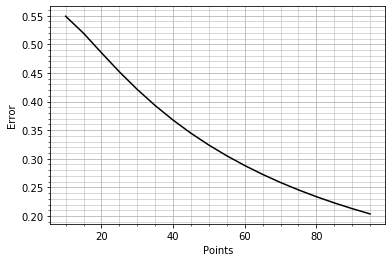

           0
10  0.549093
15  0.519363
20  0.485206
25  0.451963
30  0.421129
35  0.393034
40  0.367592
45  0.344588
50  0.323919
55  0.305229
60  0.288212
65  0.272690
70  0.258535
75  0.245650
80  0.233801
85  0.222886
90  0.212882
95  0.203626


In [8]:
boundary_conditions = [time_conditions, start_x_conditions, end_x_conditions,start_y_conditions, end_y_conditions]

errors = []
points = []
for i in range(10, 100, 5):
    l, m, n = i, i, i
    computed_u = processing(n, l, m, calculate_k, boundary_conditions, main, epsilon = 1e-4)
    u_analit = analit_u(n, l, m)
    error = diff(computed_u, u_analit)
    points.append(i)
    errors.append(error)
    
fig, ax = plt.subplots()   
plt.plot(points, errors, color = 'black')
plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('Error')
ax.set_xlabel('Points')
plt.show()

table_1 = pd.DataFrame(errors,points)
print(table_1)

Порядок аппроксимации:

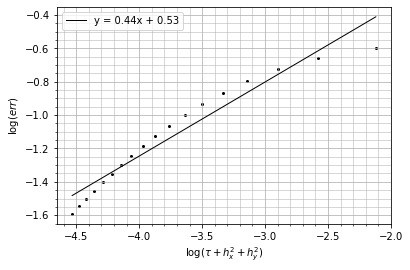

In [23]:
step = []
for i in range(10, 100, 5):
    step.append(1/i+1/i**2+1/i**2)
    
z = np.polyfit(np.log(step), np.log(errors), 1)
f = np.poly1d(z)
f_new = np.linspace(np.log(step)[0],np.log(step)[-1], 100)
l_new = f(f_new)

fig, ax = plt.subplots()   
plt.scatter(np.log(step), np.log(errors), color = 'black', s = 4)
plt.plot(f_new, l_new, linewidth = 1, color = 'black', label = 'y = 0.44x + 0.53')
plt.grid(True)
ax.minorticks_on()
ax.grid(which='major', linewidth = 0.75)
ax.grid(which='minor', linewidth = 0.5)
ax.set_ylabel('$\log(err)$')
ax.set_xlabel(r'$\log(\tau+h_x^2+h_{y}^2)$')
plt.legend()
plt.show()

Имеем первый порядок аппроксимации по $\tau$ и второй порядок по $h$